In [214]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as fp
import matplotlib.dates as mdates

# matplotlib用ラベル日本語化設定
JP = fp(fname=r"C:\WINDOWS\Fonts\BIZ-UDGothicR.ttc", size=14)
JPFONT = {"family": "BIZ UDGothic"}

# kaggleのUCIデータセットを使用
df = pd.read_csv("./data.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [215]:
# 目的変数（M：悪性⇒1，B：良性⇒0）
y = df.diagnosis.apply(lambda _: 1 if _ == "M" else 0)

# 説明変数（"Unnamed: 32" は除外）
X = df.loc[:, "radius_mean": "fractal_dimension_worst"]
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [216]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)

# 標準化
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# ロジスティック回帰
lr = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000)
lr.fit(X_train_scaled, y_train)

print(f"学習スコア: {lr.score(X_train_scaled, y_train):.3f}")
print(f"推定スコア: {lr.score(X_test_scaled, y_test):.3f}")
print("混同行列:")
print(confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test_scaled)))


学習スコア: 0.989
推定スコア: 0.965
混同行列:
[[66  1]
 [ 3 44]]


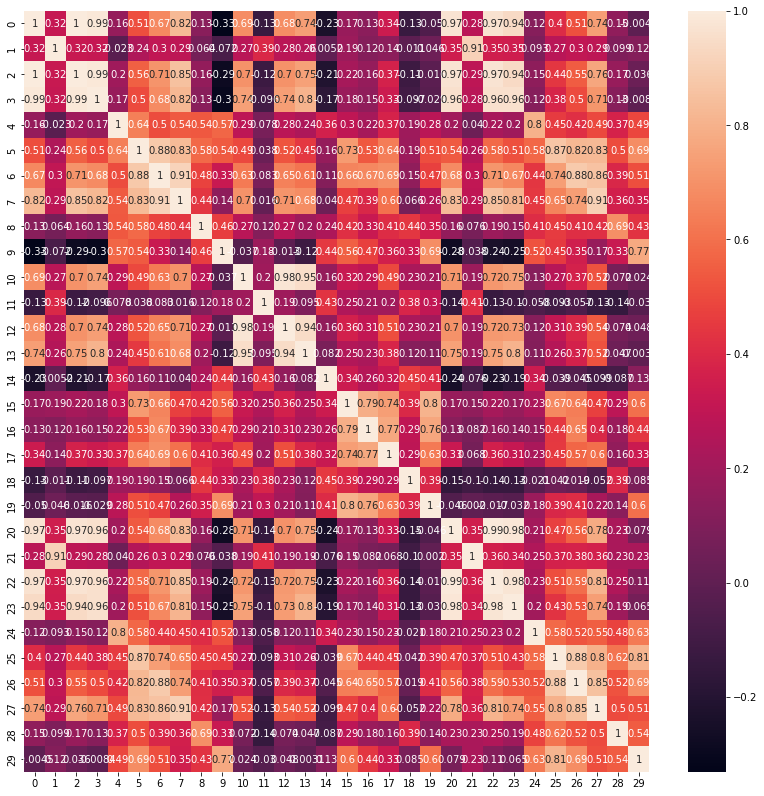

In [217]:
# 【確認】各次元の相関をヒートマップ化
plt.figure(figsize=(14, 14))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True)
plt.show()

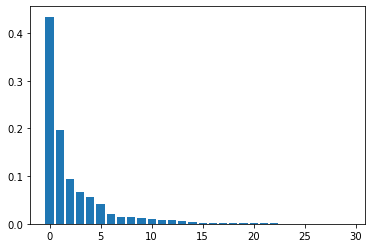

2次主成分までの累積寄与率 = 63.17%


In [237]:
# 【確認】主成分の寄与率を算出しグラフ化
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(30), pca.explained_variance_ratio_)
plt.show()

k = 2
print(f"{k}次主成分までの累積寄与率 = {sum(pca.explained_variance_ratio_[:k]):.2%}")


学習データ数(行,主成分): (455, 2)
寄与率: [0.43430767 0.19740115]
学習スコア: 0.963
推定スコア: 0.921
混同行列:
[[62  5]
 [ 4 43]]
係数 =  [[ 1.80551478 -0.93275246]]
切片 =  [-0.43825402]
y = x * 1.9356848137012759 + -0.4698502964883821


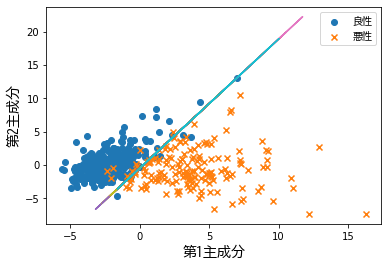

In [222]:
# PCA(次元数2まで圧縮)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"学習データ数(行,主成分): {X_train_pca.shape}")
print(f"寄与率: {pca.explained_variance_ratio_}")

# 学習
lr = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000)
lr.fit(X_train_pca, y_train)

print(f"学習スコア: {lr.score(X_train_pca, y_train):.3f}")
print(f"推定スコア: {lr.score(X_test_pca, y_test):.3f}")
print("混同行列:")
print(confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test_pca)))

# 切片と傾き
print("係数 = ", lr.coef_)
print("切片 = ", lr.intercept_)
a = -lr.coef_[0][0]/lr.coef_[0][1]
b = -lr.intercept_[0]/lr.coef_[0][1]
print(f"y = x * {a} + {b}")

# グラフ表示用にデータを加工
temp = pd.DataFrame(X_train_pca)
temp["diagnosis"] = y_train.values
temp_b = temp[temp["diagnosis"] == 0]
temp_m = temp[temp["diagnosis"] == 1]

# データを散布図としてプロット
fig, ax = plt.subplots()
ax.scatter(x=temp_b[0], y=temp_b[1], marker='o', label="良性")
ax.scatter(x=temp_m[0], y=temp_m[1], marker='x', label="悪性")
ax.set_xlabel('第1主成分', fontproperties=JP)
ax.set_ylabel('第2主成分', fontproperties=JP)

# 決定境界をプロット
ax.plot(X_train_scaled, X_train_scaled * a + b)
ax.legend(prop=JPFONT)  # 汎用ラベル表示
plt.show()
